# Handwritten Digit Recognition with Convolutional neural network

Handwritten digits from MNIST datase
60,000 training set and 10,000 test sets
Each example is a 28x28 grayscale image, associated with a label from 10 classes

Train a CNN
1. 64 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
3. 128-neurons hidden layer (ReLU)
4. output layer (softmax)

Optimizer: Adaptive Moment Estimation (Adam)

Loss function: sparse categorical cross-entropy

## Train with maximum of 20 ephochs and cutoff accuracy of 99.8 %

In [1]:
import tensorflow as tf

# Set callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

#obtain MNIST train and test sets
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalization of data
training_images = training_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0


In [3]:
# CNN construction
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Optimizer and Loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Output the summary of CNN
model.summary()

# Training
model.fit(training_images, training_labels, epochs=20,callbacks=[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 38s 635us/sample - loss: 0.1352 - acc: 0.9600

## Evaluation

In [4]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 164us/sample - loss: 0.0477 - acc: 0.9873

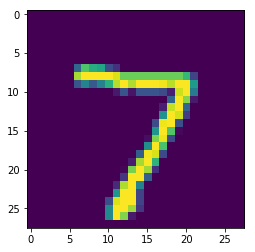

In [5]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28))
plt.show()

In [6]:
import numpy as np
classifications = model.predict(test_images)
index, = np.where(classifications[0] == max(classifications[0]))
print(index)

[7]


## Visualize the convolutions and pooling

In [17]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


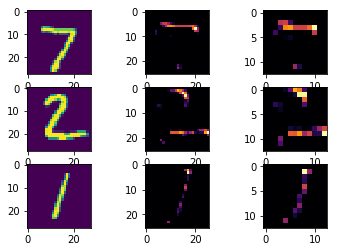

In [37]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,3)
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 40
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Input pictures
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28))
axarr[0,0].grid(False)
axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28))
axarr[1,0].grid(False)
axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
axarr[2,0].grid(False)

# pictures in convolution and maxpooling layers
for x in range(0,2):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x+1].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x+1].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x+1].grid(False)
plt.show()